<a href="https://colab.research.google.com/github/NatalyAraiza/Introduccion_estadistica_R/blob/master/Itroduccion_estadistica_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Indice***
---
*   Comandos basicos en R
*   Comandos matemáticos basicos
*   Comandos estadisticos basicos
*   Importar archivos y graficar


#***Comandos basicos en R***
---


**Solicitar ayuda**

In [ ]:
help()

**Ayuda en linea hiper texto**

In [ ]:
help.start()

starting httpd help server ...
 done



If the browser launched by 'xdg-open' is already running, it is *not*
    restarted, and you must switch to its window.
Otherwise, be patient ...


**Solicitar ayuda de una función especifica de R, en este caso distribución normal**

In [ ]:
? rnorm

**Actualizar paquetes**

In [ ]:
update.packages

function (lib.loc = NULL, repos = getOption("repos"), contriburl = contrib.url(repos, 
    type), method, instlib = NULL, ask = TRUE, available = NULL, 
    oldPkgs = NULL, ..., checkBuilt = FALSE, type = getOption("pkgType")) 
{
    force(ask)
    text.select <- function(old) {
        update <- NULL
        for (k in seq_len(nrow(old))) {
            cat(old[k, "Package"], ":\n", "Version", old[k, "Installed"], 
                "installed in", old[k, "LibPath"], if (checkBuilt) 
                  paste("built under R", old[k, "Built"]), "\n", 
                "Version", old[k, "ReposVer"], "available at", 
                simplifyRepos(old[k, "Repository"], type))
            cat("\n")
            answer <- askYesNo("Update?")
            if (is.na(answer)) {
                cat("cancelled by user\n")
                return(invisible())
            }
            if (isTRUE(answer)) 
                update <- rbind(update, old[k, ])
        }
        update
    }
    if (is.null(lib.loc)) 
        lib.loc <- .libPaths()
    if (type == "both" && (!missing(contriburl) || !is.null(available))) {
        stop("specifying 'contriburl' or 'available' requires a single type, not type = \"both\"")
    }
    if (is.null(available)) {
        available <- available.packages(contriburl = contriburl, 
            method = method, ...)
        if (missing(repos)) 
            repos <- getOption("repos")
    }
    if (!is.matrix(oldPkgs) && is.character(oldPkgs)) {
        subset <- oldPkgs
        oldPkgs <- NULL
    }
    else subset <- NULL
    if (is.null(oldPkgs)) {
        oldPkgs <- old.packages(lib.loc = lib.loc, contriburl = contriburl, 
            method = method, available = available, checkBuilt = checkBuilt)
        if (missing(repos)) 
            repos <- getOption("repos")
        if (!is.null(oldPkgs)) {
            pkg <- 0L
            while (pkg < nrow(oldPkgs)) {
                pkg <- pkg + 1L
                if (find.package(oldPkgs[pkg], lib.loc = lib.loc) != 
                  find.package(oldPkgs[pkg], lib.loc = oldPkgs[pkg, 
                    2])) {
                  warning(sprintf("package '%s' in library '%s' will not be updated", 
                    oldPkgs[pkg], oldPkgs[pkg, 2]), call. = FALSE, 
                    immediate. = TRUE)
                  oldPkgs <- oldPkgs[-pkg, , drop = FALSE]
                  pkg <- pkg - 1L
                }
            }
        }
        if (is.null(oldPkgs)) 
            return(invisible())
    }
    else if (!(is.matrix(oldPkgs) && is.character(oldPkgs))) 
        stop("invalid 'oldPkgs'; must be a character vector or a result from old.packages()")
    if (!is.null(subset)) {
        oldPkgs <- oldPkgs[rownames(oldPkgs) %in% subset, , drop = FALSE]
        if (nrow(oldPkgs) == 0) 
            return(invisible())
    }
    update <- if (is.character(ask) && ask == "graphics") {
        if (.Platform$OS.type == "windows" || .Platform$GUI == 
            "AQUA" || (capabilities("tcltk") && capabilities("X11"))) {
            k <- select.list(oldPkgs[, 1L], oldPkgs[, 1L], multiple = TRUE, 
                title = "Packages to be updated", graphics = TRUE)
            oldPkgs[match(k, oldPkgs[, 1L]), , drop = FALSE]
        }
        else text.select(oldPkgs)
    }
    else if (isTRUE(ask)) 
        text.select(oldPkgs)
    else oldPkgs
    if (length(update)) {
        if (is.null(instlib)) 
            instlib <- update[, "LibPath"]
        libs <- unique(instlib)
        for (l in libs) if (type == "both") 
            install.packages(update[instlib == l, "Package"], 
                l, repos = repos, method = method, ..., type = type)
        else install.packages(update[instlib == l, "Package"], 
            l, contriburl = contriburl, method = method, available = available, 
            ..., type = type)
    }
}
<bytecode: 0x564680bfcdd0>
<environment: namespace:utils>

**Instalar un paquete esfecifico (Ej. "qcc")**

In [ ]:
install.packages("qcc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Cargar un paquete instalado**

Nota: En R para utilizar ciertas funciones primero tenemos que instalar un paquete y despues cargarlo. Ambos pasos son necesarios.

In [ ]:
library("qcc")

**Muestra el directorio de trabajo actual**

In [ ]:
getwd()

[1] "/content"

**Cambiar directorio de trabajo**

Al usar nuevamente getwd() vemos que se actualizó el directorio de trabajo

In [ ]:
setwd("sample_data")

In [ ]:
getwd()

[1] "/content/sample_data"

**Crea una carpeta llamada pruebas en el caso de que no exista**

In [ ]:
 if ( !file.exists("pruebas") ) { dir.create("pruebas") }

**R cuenta con varios demos, con ellos podemos conocer algunas funciones de cierto paquetes para tener una idea general de lo que se puede hacer con ellos**


**Con este comando podemos ver la lista de los demos existentes**

In [ ]:
demo()

**Para correr un demo en especial utilizamos el mismo comando pero le indicamos el nombre del demo que deseamos**



	demo(plotmath)
	---- ~~~~~~~~

> #  Copyright (C) 2002-2016 The R Core Team
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## --- "math annotation" in plots :
> 
> ######
> # create tables of mathematical annotation functionality
> ######
> make.table <- function(nr, nc) {
+     savepar <- par(mar=rep(0, 4), pty="s")
+     plot(c(0, nc*2 + 1), c(0, -(nr + 1)),
+          type="n", xlab="", ylab="", axes=FALSE)
+     savepar
+ }

> get.r <- function(i, nr) {
+     i %% nr + 1
+ }

> get.c <- function(i, nr) {
+     i %/% nr + 1
+ }

> draw.title.cell <- function(title, i, nr) {
+     r <- get.r(i, nr)
+     c <- get.c(i, nr)
+     text(2*c - .5, -r, title)
+     rect((2*(c - 1) + .5), -(r - .5), (2*c + .5), -(r + .5))
+ }

> draw.plotmath.cell <- function(expr, i, nr, string = NULL) {
+     r <- get.r(i, nr)
+     c <- get.c(i, nr)
+     if (is.null(string)) {
+         string <- deparse(expr)
+         string <- substr(string, 12, nchar(string) - 1)
+     }
+    

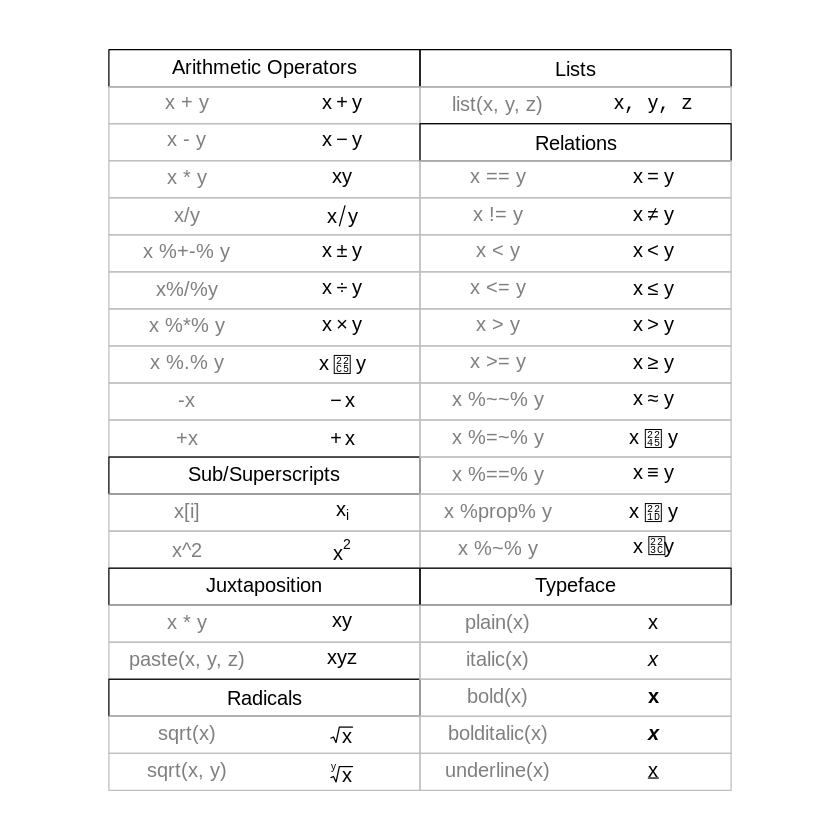

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 0

> draw.title.cell("Ellipsis", i, nr); i <- i + 1

> draw.plotmath.cell(expression(list(x[1], ..., x[n])), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x[1] + ... + x[n]), i, nr); i <- i + 1

> draw.plotmath.cell(expression(list(x[1], cdots, x[n])), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x[1] + ldots + x[n]), i, nr); i <- i + 1

> draw.title.cell("Set Relations", i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %subset% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %subseteq% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %supset% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %supseteq% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %notsubset% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %in% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %notin% y), i, nr); i <- i + 1

> draw.title.cell("Accents", i, nr); i <- i + 1

> draw.plotmath.cell(expression(

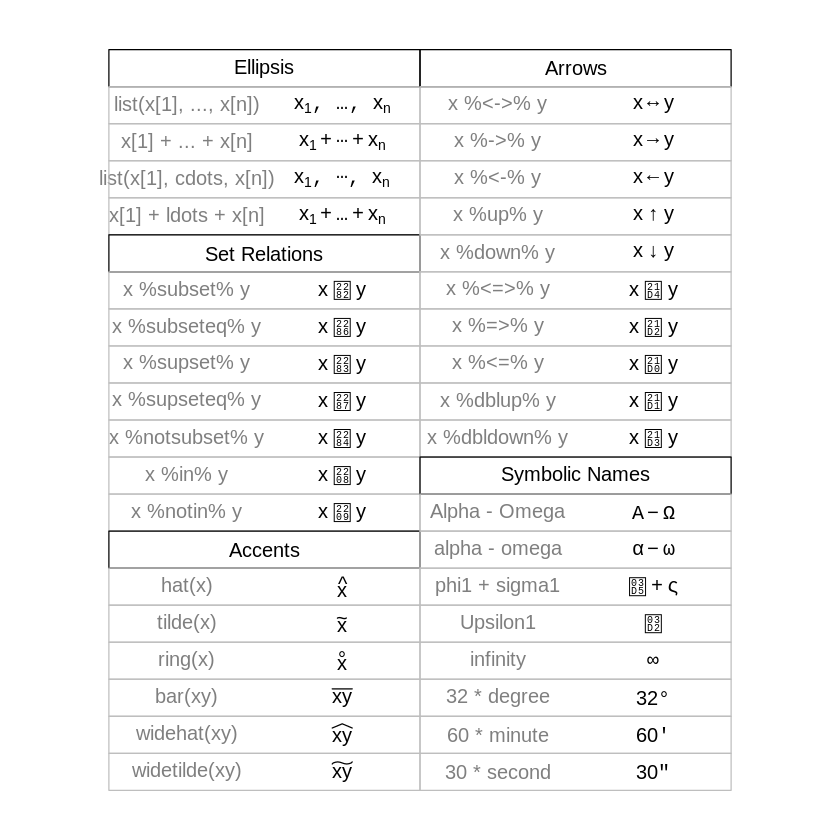

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 4

> draw.plotmath.cell(expression(x + phantom(0) + y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x + over(1, phantom(0))), i, nr); i <- i + 1

> draw.title.cell("Fractions", i, nr); i <- i + 1

> draw.plotmath.cell(expression(frac(x, y)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(over(x, y)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(atop(x, y)), i, nr); i <- i + 1

> # Need fewer, taller rows and fewer, wider columns for big operators ...
> nr <- 10

> nc <- 1

> make.table(nr, nc)


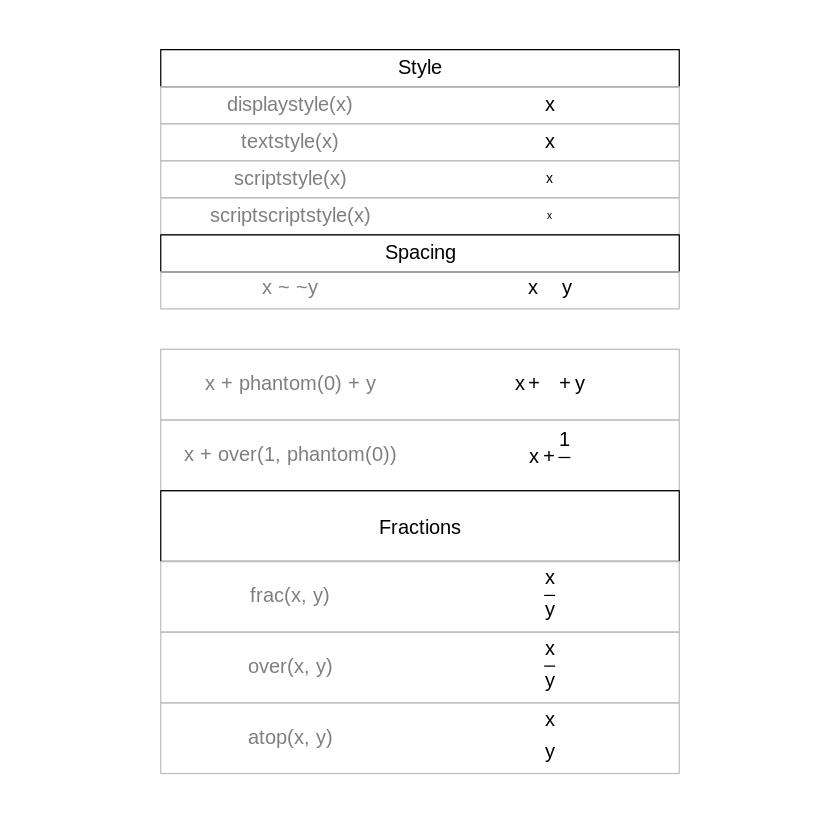

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 0

> draw.title.cell("Big Operators", i, nr); i <- i + 1

> draw.plotmath.cell(expression(sum(x[i], i=1, n)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(prod(plain(P)(X == x), x)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(integral(f(x) * dx, a, b)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(union(A[i], i==1, n)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(intersect(A[i], i==1, n)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(lim(f(x), x %->% 0)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(min(g(x), x >= 0)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(inf(S)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(sup(S)), i, nr); i <- i + 1

> nr <- 11

> make.table(nr, nc)


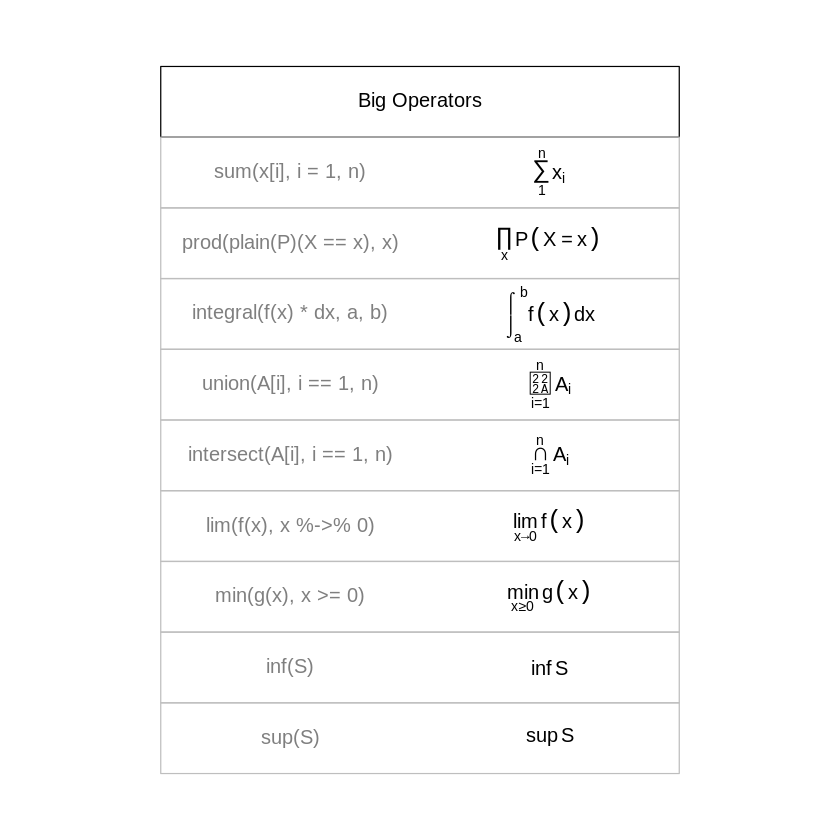

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 0

> draw.title.cell("Grouping", i, nr); i <- i + 1

> # Those involving '{ . }' have to be done "by hand"
> draw.plotmath.cell(expression({}(x , y)), i, nr, string="{}(x, y)"); i <- i + 1

> draw.plotmath.cell(expression((x + y)*z), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x^y + z),   i, nr); i <- i + 1

> draw.plotmath.cell(expression(x^(y + z)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x^{y + z}), i, nr, string="x^{y + z}"); i <- i + 1

> draw.plotmath.cell(expression(group("(", list(a, b), "]")), i, nr); i <- i + 1

> draw.plotmath.cell(expression(bgroup("(", atop(x, y), ")")), i, nr); i <- i + 1

> draw.plotmath.cell(expression(group(lceil, x, rceil)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(group(lfloor, x, rfloor)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(group("|", x, "|")), i, nr); i <- i + 1

> par(oldpar)


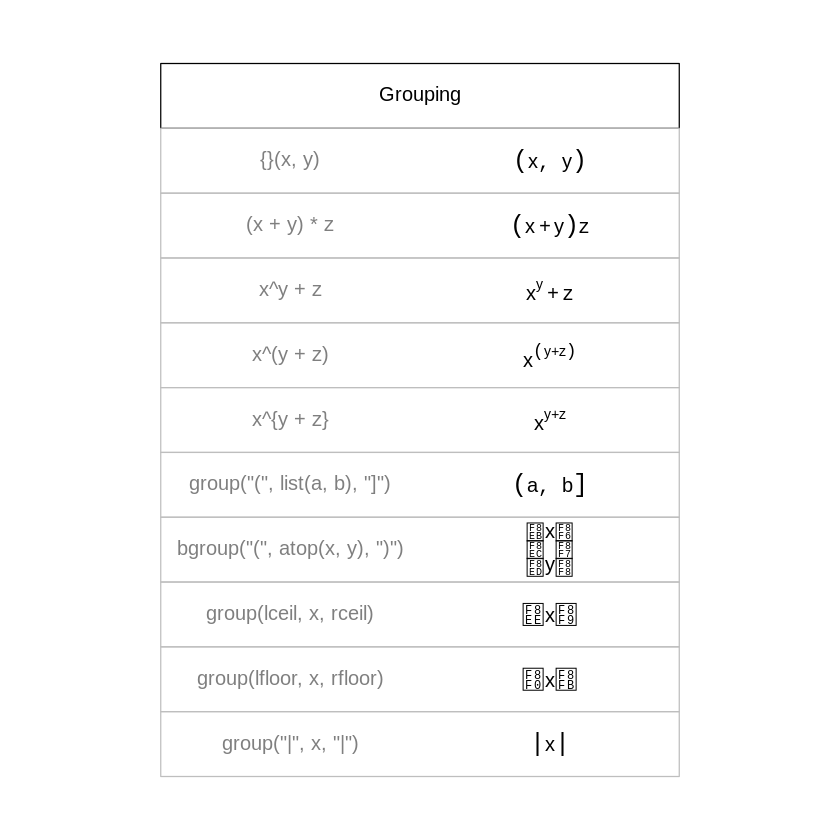

In [ ]:
demo("plotmath")

# **Comandos matemáticos basicos**
----------------------------------

### **R como calculadora**

**Suma**


In [ ]:
10+5

[1] 15

**Resta**

In [ ]:
23-13

[1] 10

**Multiplicación**

In [ ]:
3*4

[1] 12

**Division**

In [ ]:
4/3

[1] 1.333333

**Potencia**

In [ ]:
3^3

[1] 27

**Valor infinito** 

In [ ]:
5/0

[1] Inf

**Division entera** 

In [ ]:
5%/%2

[1] 2

**Modulo**

In [ ]:
5%%2

[1] 1

**Flotante con n digitos**

In [ ]:
round(3.45678, digits = 2) 

[1] 3.46

### **Tipos de datos en R**

**Objetos numéricos**


Nota: En el lenguaje R se utiliza el operador de asignacion <-, tambien se puede utilizar el = pero en algunos caso no es recomendable, por lo que es mejor utilizar el operador <-

In [ ]:
x <- 5L

**Para revisar el tipo de dato de una variable**

In [ ]:
class(x)

[1] "integer"

Otros ejemplos

In [ ]:
y <- 2

In [ ]:
class(y)

[1] "numeric"

In [ ]:
w <- 3+4i

In [ ]:
class(w)

[1] "complex"

**Lista de las variables existentes**

In [ ]:
ls()

[1] "draw.plotmath.cell" "draw.title.cell"    "get.c"             
 [4] "get.r"              "i"                  "make.table"        
 [7] "nc"                 "nr"                 "oldpar"            
[10] "w"                  "x"                  "y"

**Eliminar una variable**

In [ ]:
rm(x)

In [ ]:
x

ERROR: ignored

### **Funciones y constantes matematicas**

**Logaritmo base 10**

In [ ]:
log10(100)

[1] 2

**Logaritmo base e**

In [ ]:
log(2.7172)

[1] 0.9996019

**Logaritmo base 2**

In [ ]:
log2(64)

[1] 6

**Valor absoluto**

In [ ]:
abs(-12)

[1] 12

**Funcion exponencial base e**

In [ ]:
exp(1)

[1] 2.718282

**Raiz cuadrada**

In [ ]:
sqrt(81)

[1] 9

**Constante pi**

In [ ]:
pi

[1] 3.141593

**Maneja una variable como entera aunque sea flotante haciendo un redonde hacia abajo**

In [ ]:
z <- as.integer(x/y)

In [ ]:
z

[1] 2

**Redondea un numero a 2 digitos**

In [ ]:
round(3.476,digits=2)

[1] 3.48

**Obtener el entero mas pequeño que sea mayor que el numero que se le indique**

In [ ]:
ceiling(3.475)

[1] 4

**Obtener el entero mas grande que sea menor que el numero que se le indique**

In [ ]:
floor(3.475)

[1] 3

### **Funciones para manejo de cadenas**

**Replica el primer argumento el numero de veces indicado en el segundo argumento**

In [ ]:
rep("Hola",2)

[1] "Hola" "Hola"

 **Concatena cadenas**

In [ ]:
paste("Zapopan","Jalisco")

[1] "Zapopan Jalisco"

**Obtiene una subcadena de una cadena, como argumento indicamos la posicion inicial y la posicion final**

In [ ]:
substr("Guadalajara",3,6)

[1] "adal"

### **Vectores en R**

**Crear vector de enteros (del 1 a 1000)**

In [ ]:
v2 <- 1:100

In [ ]:
v2

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

**Crear vector con los cuadrados del vector v2**


Nota: En lenguaje R, a diferencia de otros lenguajes, es muy común utilizar en el identificador de la variable algun punto en donde normalmente utilizamos un guion bajo para separar las palablas (Ej. variable_normal, variable.normal)

In [ ]:
v2.cuadrado <- v2 ^ 2

In [ ]:
v2.cuadrado

[1]     1     4     9    16    25    36    49    64    81   100   121   144
 [13]   169   196   225   256   289   324   361   400   441   484   529   576
 [25]   625   676   729   784   841   900   961  1024  1089  1156  1225  1296
 [37]  1369  1444  1521  1600  1681  1764  1849  1936  2025  2116  2209  2304
 [49]  2401  2500  2601  2704  2809  2916  3025  3136  3249  3364  3481  3600
 [61]  3721  3844  3969  4096  4225  4356  4489  4624  4761  4900  5041  5184
 [73]  5329  5476  5625  5776  5929  6084  6241  6400  6561  6724  6889  7056
 [85]  7225  7396  7569  7744  7921  8100  8281  8464  8649  8836  9025  9216
 [97]  9409  9604  9801 10000

**Crear vector vA**

In [ ]:
vA <- c(10,8,6)

In [ ]:
vA

[1] 10  8  6

**Multiplicar cada elemento del vector vA por 10**

In [ ]:
vA * 10

[1] 100  80  60

**Crear un vector con numeros del 1 al 10 con saltos de 2 en 2**

In [ ]:
vB <- c(seq(1,10,2))

In [ ]:
vB

[1] 1 3 5 7 9

**Mostrar el primer elemento del vector vA**

In [ ]:
vA[1]

[1] 10

**Mostrar los primeros cuatro elementos del vector vB**

In [ ]:
vB[1:4]

[1] 1 3 5 7

**Devuelve los indices de los elementos que cumplen la condicion que se le indique**

In [ ]:
which (vB > 3)

[1] 3 4 5

**Una caracteriztica de los vectores en lenguaje R es que los elementos pueden ser de varios tipos de datos**

**Crearemos el vector sex, utilizando la función rep vista previamente**

In [ ]:
sex <- c( rep('M', 3), rep('F', 3) )

In [ ]:
sex

[1] "M" "M" "M" "F" "F" "F"

**Mostramos los indices de los elementos del vector sex que sean igual a 'M'**

In [ ]:
which (sex == 'M')

[1] 1 2 3

**R nos permite realizar operaciones entre vectores**

**Creamos el vector x1**

In [ ]:
x1 <- c(1,2,3)

**Creamos el vector y1**

In [ ]:
y1 <- c(4,5,6)

**Producto de vectores**

In [ ]:
x1 * y1

[1]  4 10 18

**Valor minimo en el vector**

In [ ]:
min(x1)

[1] 1

**Valor maximo en el vector**

In [ ]:
max(x1)

[1] 3

**Producto interno de dos vectores**

In [ ]:
outer(x1,y1)

4,5,6
8,10,12
12,15,18


**Producto punto de dos vectores**

In [ ]:
x1%*%y1 

32


**Se puede realizar operaciones de conjuntos con los vectores, por ejemplo union e interaccion, en el caso de la interaccion calcula un factor que representa la interacción de los factores dados. 
El resultado de interaccion siempre está desordenado.**

In [ ]:
 A <- c(1,2,3)
 B <- c(4,5,6)
 union(A,B)
 interaction(A,B)

[1] 1 2 3 4 5 6

[1] 1.4 2.5 3.6
Levels: 1.4 2.4 3.4 1.5 2.5 3.5 1.6 2.6 3.6

### **Matrices en R**

**Creamos una matriz con numeros del 1 al 15, podemos indicarle numero de filas y numero de columnas, ésta se llenara en orden por columnas.**


**Se puede especificar la forma en la que se llenara cambiando el argumento nrow por byrow, utilizando byrow = T se llenara por fila, con     byrow = F se llenara por columna**

In [ ]:
m1 <- matrix(1:15, nrow=5, ncol=5)

In [ ]:
m1

1,6,11,1,6
2,7,12,2,7
3,8,13,3,8
4,9,14,4,9
5,10,15,5,10


**Diagonal principal de m1**

In [ ]:
diag(m1)

**Suma de columnas**

In [ ]:
colSums(m1) 

**Podemos crear una matriz con vectores previamente creados**

In [ ]:
vX <-  c(0,1,2,5,10,20)
vY <- c(76,9,43,5,25,80)

**La matriz se llenara en orden por renglones**

In [ ]:
row.bind <- rbind(vX,vY)

In [ ]:
row.bind

vX,0,1,2,5,10,20
vY,76,9,43,5,25,80


**La matriz se llenara en orden por columnas**

In [ ]:
col.bind <- cbind(vX,vY)

In [ ]:
col.bind

vX,vY
0,76
1,9
2,43
5,5
10,25
20,80


**Muestra el elemento 1,1 de la matriz**

In [ ]:
row.bind[1,1]

vX 
 0

**Mestra el renglon 4 de la matriz**

In [ ]:
row.bind[,4]

vX vY 
 5  5

**Muestra la fila 1 de la matriz**

In [ ]:
row.bind[1,]

[1]  0  1  2  5 10 20

**Muestra el indice del elemento que cumple una condición, en este caso el elemento con valor igual a 5**

In [ ]:
index <- which(vX==5)

In [ ]:
index

[1] 4

**Obtiene el elemento en el indice que le indiques**

In [ ]:
vX[index]

[1] 5

**R nos da la libertar de experimentar mezclando varias funciones**

**Por ejemplo, crearemos la matris m3 con numeros del 1 al 9, llenando la matriz en orden por columnas y especificamos que necesitamos 3 columnas, despues mostraremos el indice del elemento que cumpla una condición, en este caso el de la funcion max y min**

In [ ]:
m3 <- matrix(1:9, byrow=F, ncol=3)
m3
which.max(m3)
which.min(m3)

1,4,7
2,5,8
3,6,9


[1] 9

[1] 1

### **Listas y Data frames en R**

**Al crear una lista podemos especificar las etiquetas de los elementos**

In [ ]:
mi_lista <- list(nombre="juan",edad=28,jubilado=F)

**Mostrar las etiquetas de la lista**

In [ ]:
names(mi_lista)

[1] "nombre"   "edad"     "jubilado"

**Podemos incluir vectores como elemento dentro de una lista**

In [ ]:
mireg <- list(nombre="maria", ingresis = c(23,34,15))

**Para acceder a un elemento de la lista lo haremos a traves de su etiqueta, utilizando el operador '$'**

In [ ]:
mireg$ingresis

[1] 23 34 15